<a href="https://colab.research.google.com/github/usman-codez/Crop_Yield_Prediction/blob/main/Crop_Yield_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('yield_df.csv')
df.head()

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [5]:
df.shape

(28242, 7)

In [6]:
df.isnull().sum()

,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


We can see there is no null value so it is a cleanead data


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [11]:
df.duplicated().sum()

np.int64(2310)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


**Frequency of Areas through Graph**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

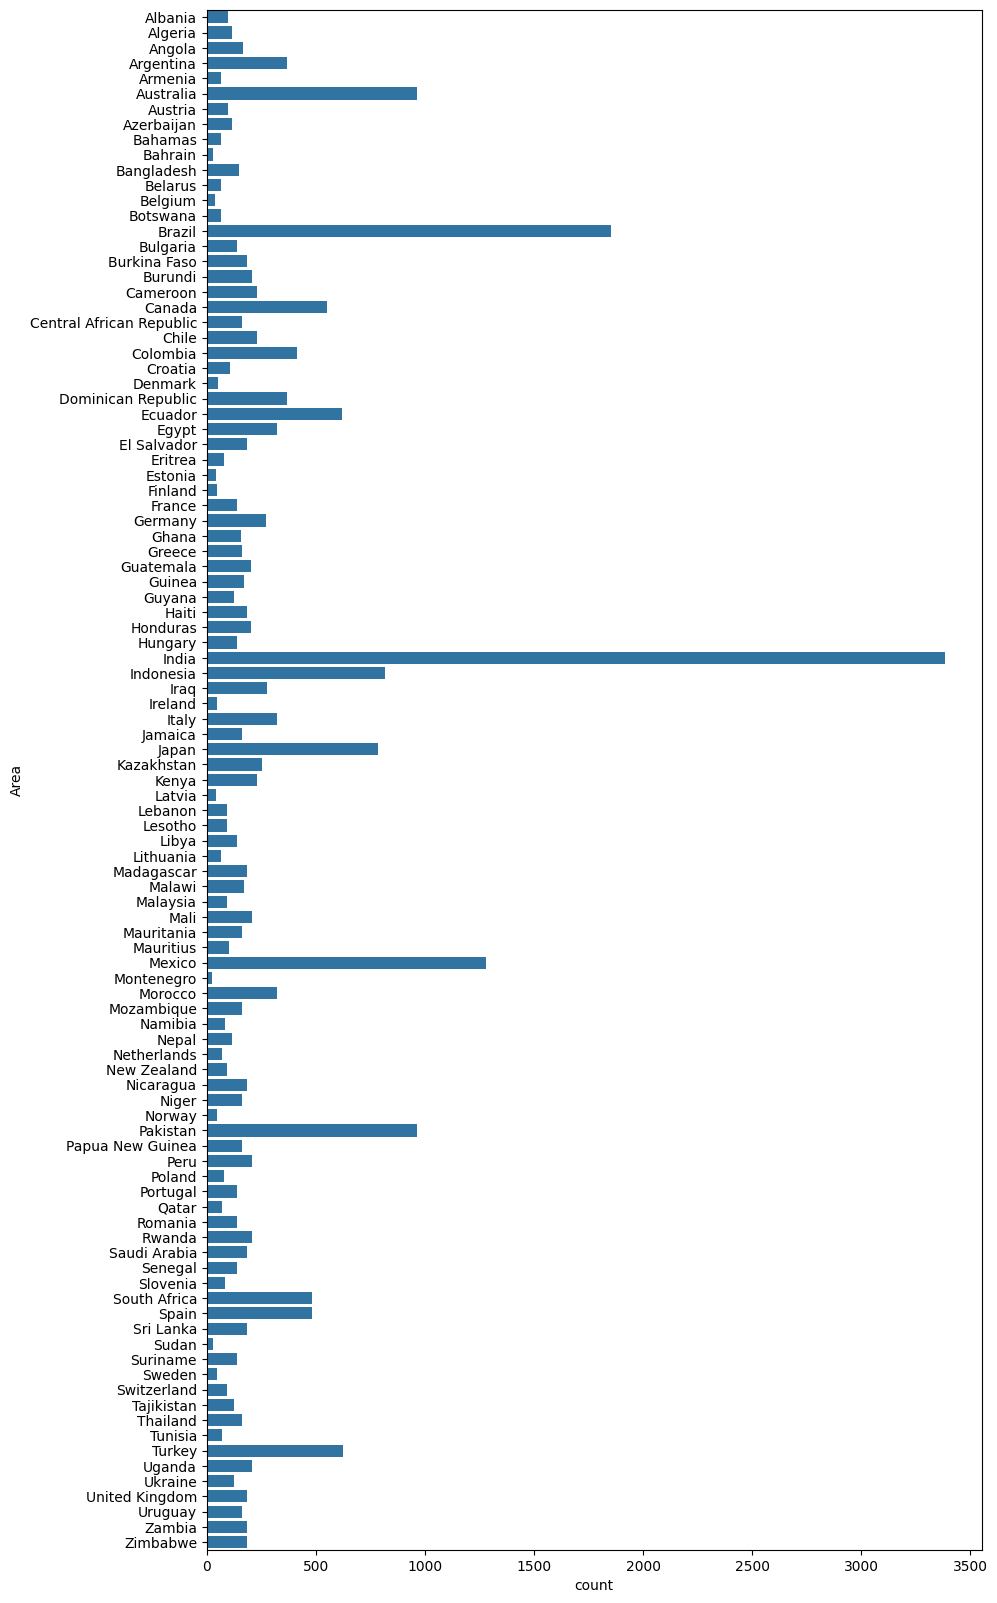

In [16]:
plt.figure(figsize=(10, 20))
sns.countplot(y='Area', data=df)
plt

**Yield of a country**

In [17]:
len(df['Area'])

25932

In [19]:
country = (df['Area'].unique())

In [20]:
df.head(2)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37


In [24]:
yield_per_country = []
for i in country:
    yield_per_country.append(df[df['Area'] == i]['hg/ha_yield'].sum())

<Axes: >

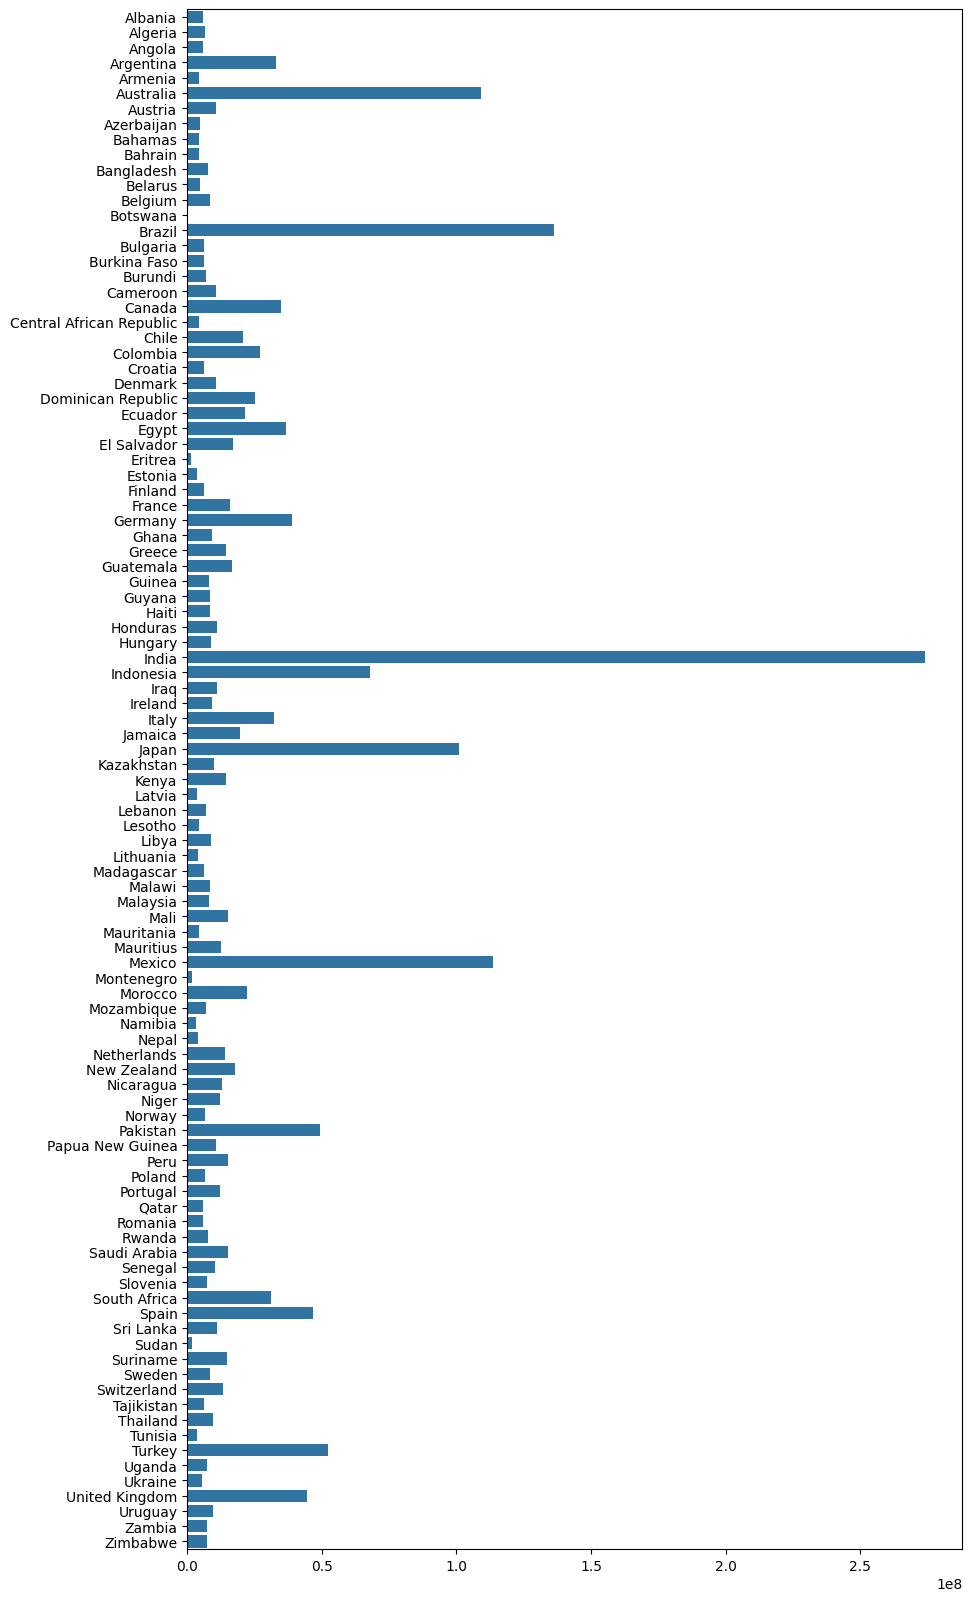

In [27]:
plt.figure(figsize=(10, 20))
sns.barplot(y=country, x=yield_per_country)

/tmp/ipython-input-3885424976.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = df['Item'], palette='Set3')


<Axes: xlabel='count', ylabel='Item'>

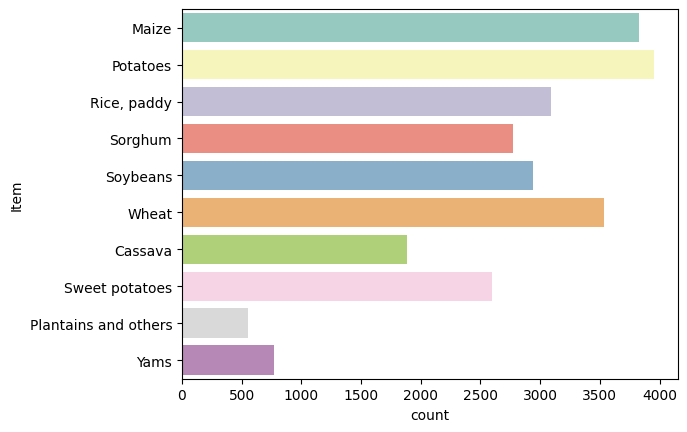

In [30]:
sns.countplot(y = df['Item'], palette='Set3')

**Lets check the crop yeild per Item**

In [31]:
crops = df['Item'].unique()

In [32]:
yield_per_item = []
for crop in crops:
    yield_per_item.append(df[df['Item'] == crop]['hg/ha_yield'].sum())

<Axes: >

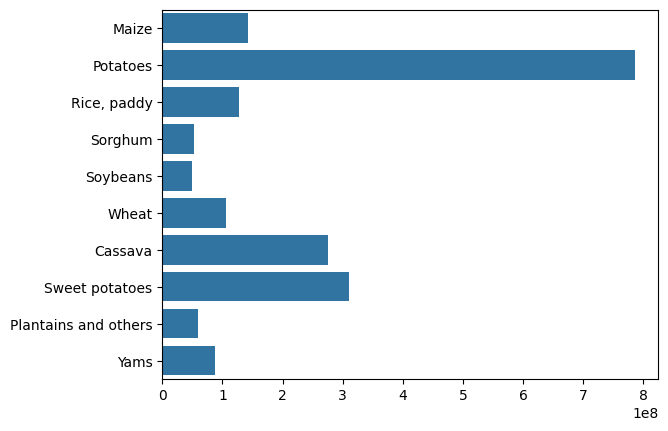

In [33]:
sns.barplot(y=crops, x=yield_per_item)

**Now train test split the data**

In [34]:
df.head(1)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37


In [35]:
x = df.drop('hg/ha_yield', axis = 1)
y = df['hg/ha_yield']

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [38]:
x_train.shape

(20745, 6)

In [40]:
x_test.shape

(5187, 6)

**Now we'll convert categorical columns into numerical and do scaling**

In [42]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [44]:
df.head(1)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37


In [43]:
one_hot = OneHotEncoder(drop='first')
scaler = StandardScaler()

In [49]:
preprocessor = ColumnTransformer(
    transformers= [
        ('one_hot', one_hot, ['Area', 'Item']),
        ('scaler', scaler, ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'])
    ],
    remainder='passthrough'
)

In [50]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('one_hot', OneHotEncoder(drop='first'),
                                 ['Area', 'Item']),
                                ('scaler', StandardScaler(),
                                 ['Year', 'average_rain_fall_mm_per_year',
                                  'pesticides_tonnes', 'avg_temp'])])

In [51]:
x_train_new = preprocessor.fit_transform(x_train)
x_test_new = preprocessor.transform(x_test)

In [52]:
x_train_new

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 122877 stored elements and shape (20745, 113)>

## Training Models

In [54]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [55]:
models = {
    'lr': LinearRegression(),
    'ls': Lasso(),
    'rg': Ridge(),
    'dt': DecisionTreeRegressor(),
    'kn': KNeighborsRegressor()
}

for name, model in models.items():
    model.fit(x_train_new, y_train)
    y_pred = model.predict(x_test_new)

    print(f'{name} MAE: {mean_absolute_error(y_test, y_pred)} Score {r2_score(y_test, y_pred)}')

lr MAE: 29920.761340711597 Score 0.7486566530283931


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43166910887.43359, tolerance: 14819338848.544127
  model = cd_fast.sparse_enet_coordinate_descent(


ls MAE: 29907.604370717872 Score 0.7485842229351424
rg MAE: 29875.000895927205 Score 0.7485397180960003
dt MAE: 4141.92018507808 Score 0.9772938344548243
kn MAE: 4868.653518411414 Score 0.9823106927202787


**Select Model**

In [56]:
dt = DecisionTreeRegressor()
dt.fit(x_train_new, y_train)

DecisionTreeRegressor()

In [57]:
dt.predict(x_test_new)

array([167489.,  15838.,  72614., ...,  52692.,   9621., 132600.])

## Example prediction

In [65]:
def prediction(Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp):
  # Create a DataFrame with the input features and correct column names
  features_df = pd.DataFrame([[Area, Item, Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp]],
                             columns=['Area', 'Item', 'Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'])
  transformed_features = preprocessor.transform(features_df)
  predicted_value = dt.predict(transformed_features).reshape(1,-1)
  return predicted_value[0]

In [66]:
Area = 'Saudi Arabia'
Item = 'Wheat'
Year = 2000
average_rain_fall_mm_per_year	= 59.0
pesticides_tonnes	= 3024.24
avg_temp = 26.55

result = prediction(Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp)

In [67]:
result

array([42640.])

In [69]:
import pickle
pickle.dump(dt, open('dt.pkl','wb'))
pickle.dump(preprocessor, open('prepro.pkl','wb'))

In [70]:
import sklearn
print(sklearn.__version__)

1.6.1


In [71]:
x_train

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
24234,Saudi Arabia,Sorghum,2000,59.0,3024.11,26.55
9468,Greece,Sweet potatoes,2012,652.0,8002.20,18.82
6793,Colombia,Maize,2006,3240.0,98328.63,27.51
28212,Zimbabwe,Potatoes,2010,657.0,3305.17,21.17
7358,Dominican Republic,Sweet potatoes,2007,1410.0,5689.80,27.08
...,...,...,...,...,...,...
23678,Portugal,Sweet potatoes,2004,854.0,16942.00,16.31
5960,Canada,Wheat,2006,537.0,36572.75,7.85
860,Australia,Potatoes,1991,534.0,17866.00,18.73
17223,Kazakhstan,Potatoes,1998,250.0,6416.14,6.94
